In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# URLs for the Excel files
stores_url = 'https://raw.githubusercontent.com/Bhavitha-Bojja/DAV-6150/e1e8d3c6b5d65424c87b1b2efcff0e34233cb7ed/stores%20data-set.csv'
features_url = 'https://raw.githubusercontent.com/Bhavitha-Bojja/DAV-6150/e1e8d3c6b5d65424c87b1b2efcff0e34233cb7ed/Features%20data%20set.csv'
sales_url = 'https://raw.githubusercontent.com/Bhavitha-Bojja/DAV-6150/e1e8d3c6b5d65424c87b1b2efcff0e34233cb7ed/sales%20data-set.csv'

In [3]:
# Load the datasets from GitHub
stores_df = pd.read_csv(stores_url)
features_df = pd.read_csv(features_url)
sales_df = pd.read_csv(sales_url)

In [4]:
# Check the first few rows of each dataset
print(stores_df.head())
print(features_df.head())
print(sales_df.head())

   Store Type    Size
0      1    A  151315
1      2    A  202307
2      3    B   37392
3      4    A  205863
4      5    B   34875
   Store        Date  Temperature  Fuel_Price  MarkDown1  MarkDown2  \
0      1  05/02/2010        42.31       2.572        NaN        NaN   
1      1  12/02/2010        38.51       2.548        NaN        NaN   
2      1  19/02/2010        39.93       2.514        NaN        NaN   
3      1  26/02/2010        46.63       2.561        NaN        NaN   
4      1  05/03/2010        46.50       2.625        NaN        NaN   

   MarkDown3  MarkDown4  MarkDown5         CPI  Unemployment  IsHoliday  
0        NaN        NaN        NaN  211.096358         8.106      False  
1        NaN        NaN        NaN  211.242170         8.106       True  
2        NaN        NaN        NaN  211.289143         8.106      False  
3        NaN        NaN        NaN  211.319643         8.106      False  
4        NaN        NaN        NaN  211.350143         8.106      False

In [5]:
# Merge the Sales and Features datasets on 'Store' and 'Date'
combined_df = pd.merge(sales_df, features_df, on=['Store', 'Date'], how='left')

# Now, merge the result with the Stores dataset on 'Store'
combined_df = pd.merge(combined_df, stores_df, on='Store', how='left')

# Check the combined dataframe
combined_df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y,Type,Size
0,1,1,05/02/2010,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
1,1,1,12/02/2010,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True,A,151315
2,1,1,19/02/2010,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False,A,151315
3,1,1,26/02/2010,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False,A,151315
4,1,1,05/03/2010,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False,A,151315


In [6]:
combined_df.shape

(421570, 17)

In [7]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday_x   421570 non-null  bool   
 5   Temperature   421570 non-null  float64
 6   Fuel_Price    421570 non-null  float64
 7   MarkDown1     150681 non-null  float64
 8   MarkDown2     111248 non-null  float64
 9   MarkDown3     137091 non-null  float64
 10  MarkDown4     134967 non-null  float64
 11  MarkDown5     151432 non-null  float64
 12  CPI           421570 non-null  float64
 13  Unemployment  421570 non-null  float64
 14  IsHoliday_y   421570 non-null  bool   
 15  Type          421570 non-null  object 
 16  Size          421570 non-null  int64  
dtypes: bool(2), float64(10), int64(3), object(2)
mem

In [8]:
combined_df['MarkDown1'].value_counts()

,count
MarkDown1,
1.50,102
460.73,102
175.64,93
9264.48,75
1483.17,75
...,...
196.40,42
243.47,42
512.15,42


In [9]:
combined_df['Date'] = pd.to_datetime(combined_df['Date'], format = '%d/%m/%Y')

In [10]:
min(combined_df['Date']), max(combined_df['Date'])

(Timestamp('2010-02-05 00:00:00'), Timestamp('2012-10-26 00:00:00'))

In [11]:
combined_df.describe().T

,count,mean,min,25%,50%,75%,max,std
Store,421570.0,22.200546,1.0,11.0,22.0,33.0,45.0,12.785297
Dept,421570.0,44.260317,1.0,18.0,37.0,74.0,99.0,30.492054
Date,421570,2011-06-18 08:30:31.963375104,2010-02-05 00:00:00,2010-10-08 00:00:00,2011-06-17 00:00:00,2012-02-24 00:00:00,2012-10-26 00:00:00,NaN
Weekly_Sales,421570.0,15981.258123,-4988.94,2079.65,7612.03,20205.8525,693099.36,22711.183519
Temperature,421570.0,60.090059,-2.06,46.68,62.09,74.28,100.14,18.447931
Fuel_Price,421570.0,3.361027,2.472,2.933,3.452,3.738,4.468,0.458515
MarkDown1,150681.0,7246.420196,0.27,2240.27,5347.45,9210.9,88646.76,8291.221345
MarkDown2,111248.0,3334.628621,-265.76,41.6,192.0,1926.94,104519.54,9475.357325
MarkDown3,137091.0,1439.421384,-29.1,5.08,24.6,103.99,141630.61,9623.07829
MarkDown4,134967.0,3383.168256,0.22,504.22,1481.31,3595.04,67474.85,6292.384031


In [12]:
# Check for any missing values after merging
print(combined_df.isnull().sum())

Store                0
Dept                 0
Date                 0
Weekly_Sales         0
IsHoliday_x          0
Temperature          0
Fuel_Price           0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
CPI                  0
Unemployment         0
IsHoliday_y          0
Type                 0
Size                 0
dtype: int64


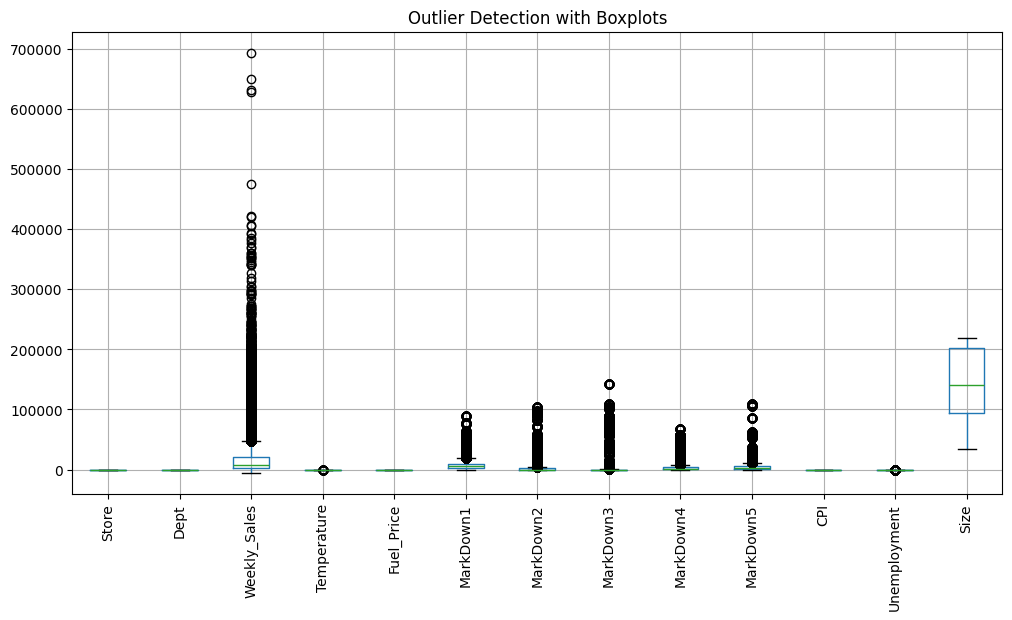

In [13]:
# Boxplots for numerical columns
numeric_columns = combined_df.select_dtypes(include=['float64', 'int64']).columns
combined_df[numeric_columns].boxplot(figsize=(12, 6))
plt.xticks(rotation=90)
plt.title('Outlier Detection with Boxplots')
plt.show()


The boxplot shows many outliers in "Weekly_Sales" and markdowns, indicating high variability, while other variables have smaller spreads. "Size" has a wider range but no extreme outliers.

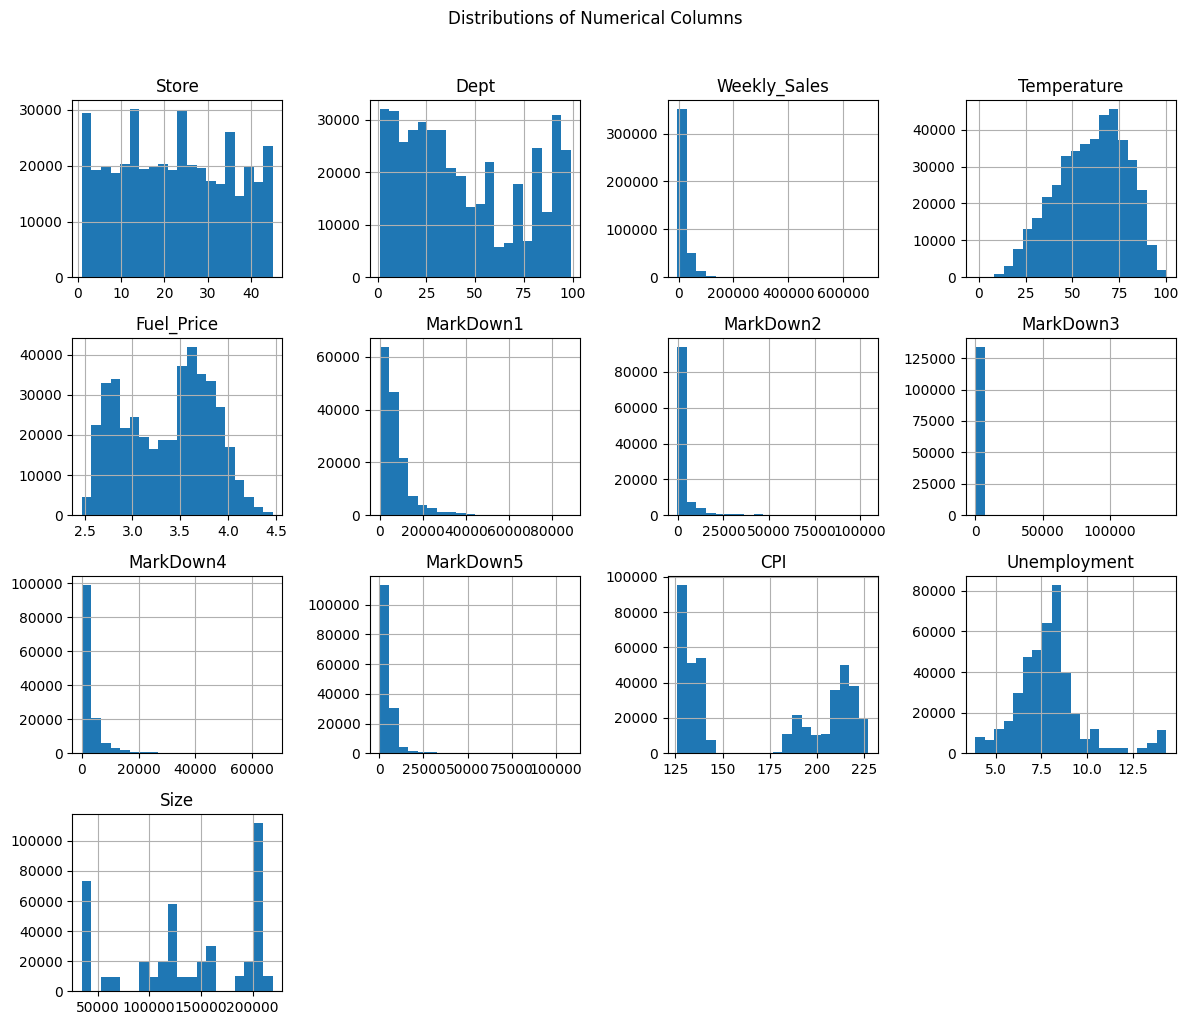

In [14]:
# Histograms for numerical columns
combined_df[numeric_columns].hist(bins=20, figsize=(12, 10), layout=(4, 4))
plt.suptitle('Distributions of Numerical Columns', y=1.02)
plt.tight_layout()
plt.show()


The histograms show that "Weekly_Sales" and markdowns are highly skewed, while "Temperature," "Fuel_Price," and "Unemployment" have more even spreads and "Size" shows distinct peaks.

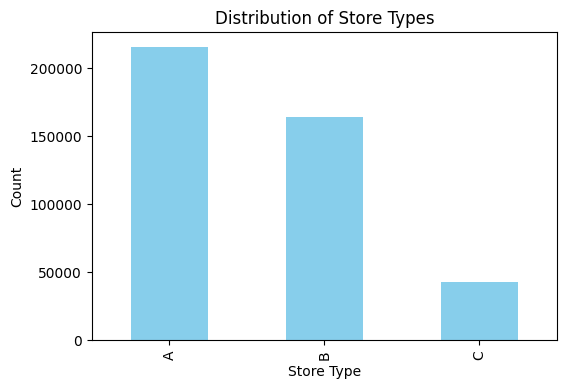

In [15]:
# Bar plot for store types
combined_df['Type'].value_counts().plot(kind='bar', color='skyblue', figsize=(6, 4))
plt.title('Distribution of Store Types')
plt.xlabel('Store Type')
plt.ylabel('Count')
plt.show()


The bar chart shows that Store Type A is the most common, followed by Type B, while Type C has the lowest count. This indicates Store Type A are more in number.

In [16]:
combined_df.columns

Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday_x', 'Temperature',
       'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4',
       'MarkDown5', 'CPI', 'Unemployment', 'IsHoliday_y', 'Type', 'Size'],
      dtype='object')

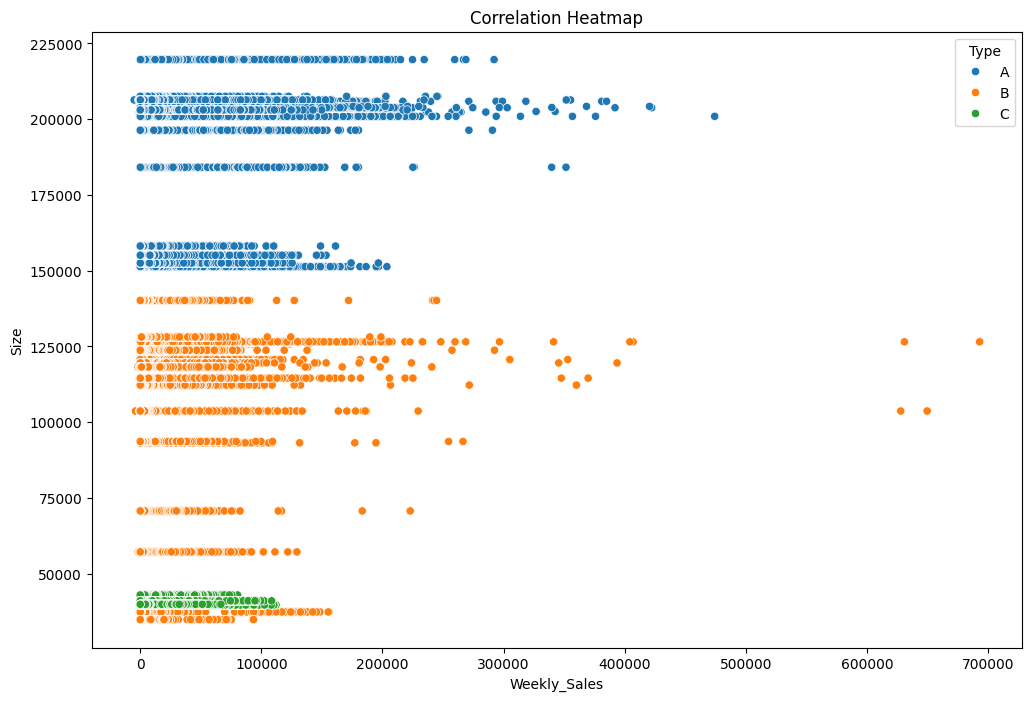

In [17]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=combined_df, y='Size', x='Weekly_Sales', hue = 'Type')
plt.title('Correlation Heatmap')
plt.show()


This scatterplot shows the relationship between store size and weekly sales, categorized by store type (A, B, and C). Larger stores (Type A) generally have higher weekly sales, while smaller stores (Type C) have lower sales.

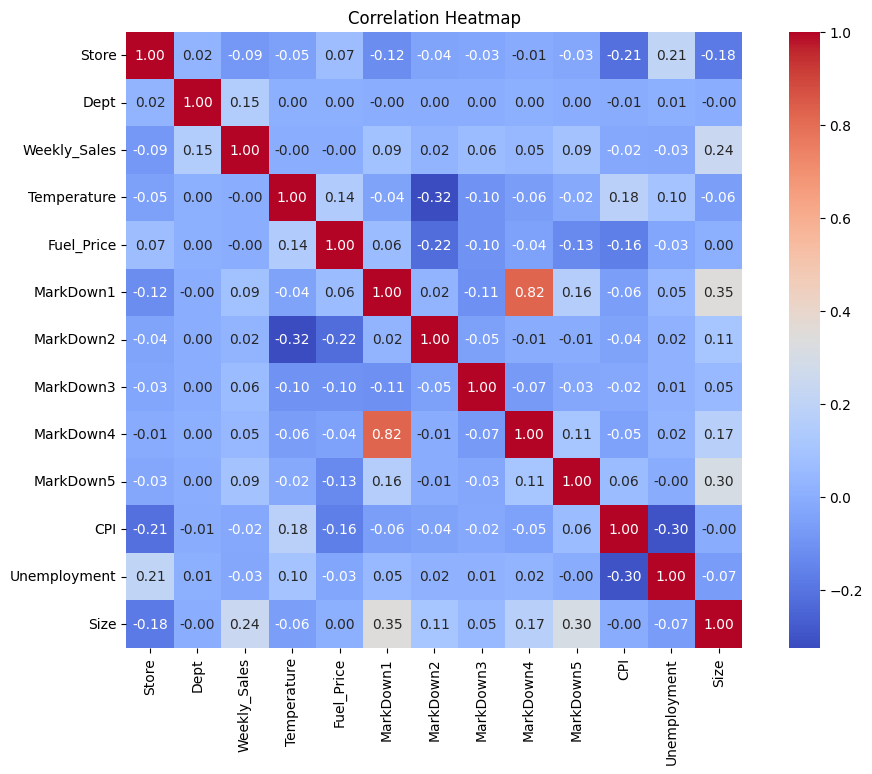

In [18]:
# Correlation matrix
corr_matrix = combined_df[numeric_columns].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title('Correlation Heatmap')
plt.show()


The correlation heatmap depicts that "Weekly_Sales" has the strongest positive correlations with "Size" and "CPI," while "Temperature" and "Unemployment" show minimal correlation. The most significant negative correlation is between "Size" and "Store," indicating an inverse relationship.

- Unemployment and CPI shows negative correlation with weekly sales which indicates inverse proportion
- Size and weekly sales are positively correlated

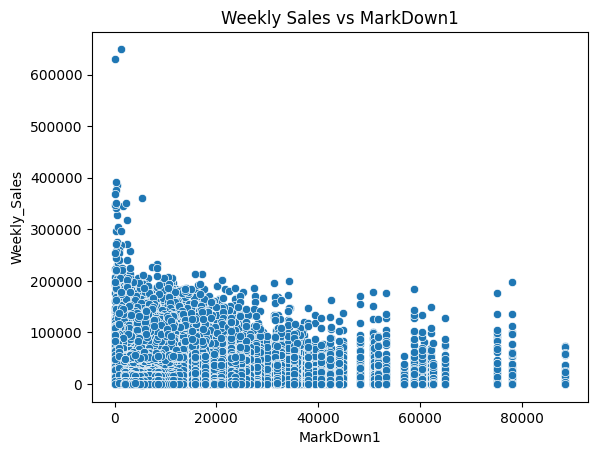

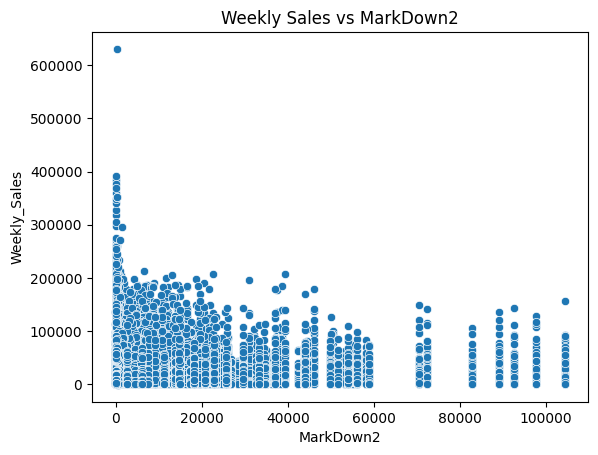

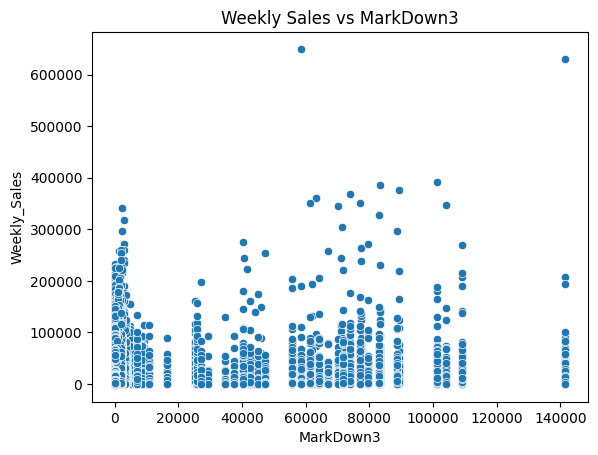

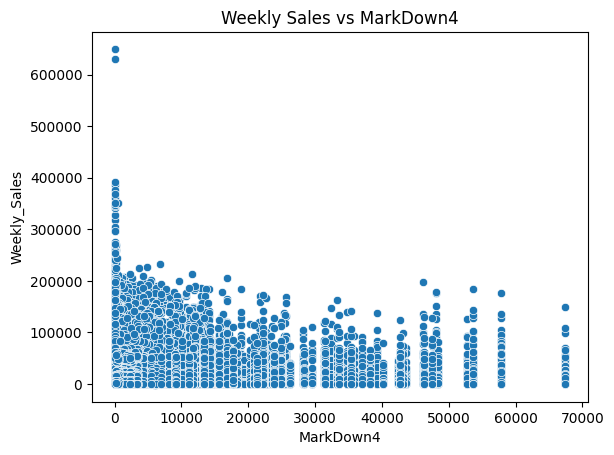

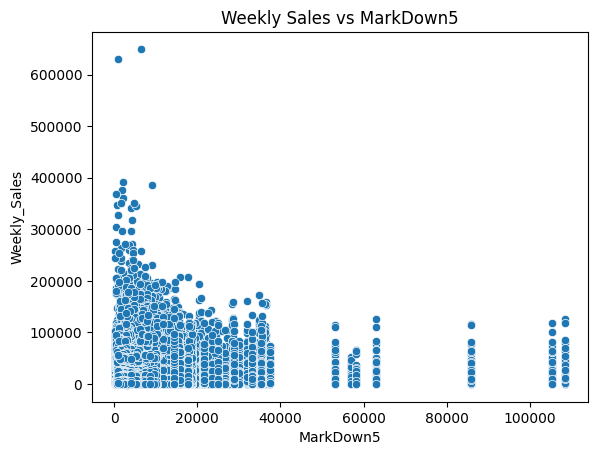

In [19]:
# Weekly Sales vs Markdown columns
markdown_columns = ['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']

for col in markdown_columns:
    sns.scatterplot(data=combined_df, x=col, y='Weekly_Sales')
    plt.title(f'Weekly Sales vs {col}')
    plt.show()


The scatter plots show that MarkDown1, MarkDown2, and MarkDown5 have a negative relationship with weekly sales, where higher markdowns lead to lower sales. For MarkDown3, there is no clear trend, but most sales happen when markdowns are below 100,000. MarkDown4 shows higher sales at markdowns below 20,000, with fewer sales at higher levels. Overall, higher markdowns don’t always result in more sales and vary by type

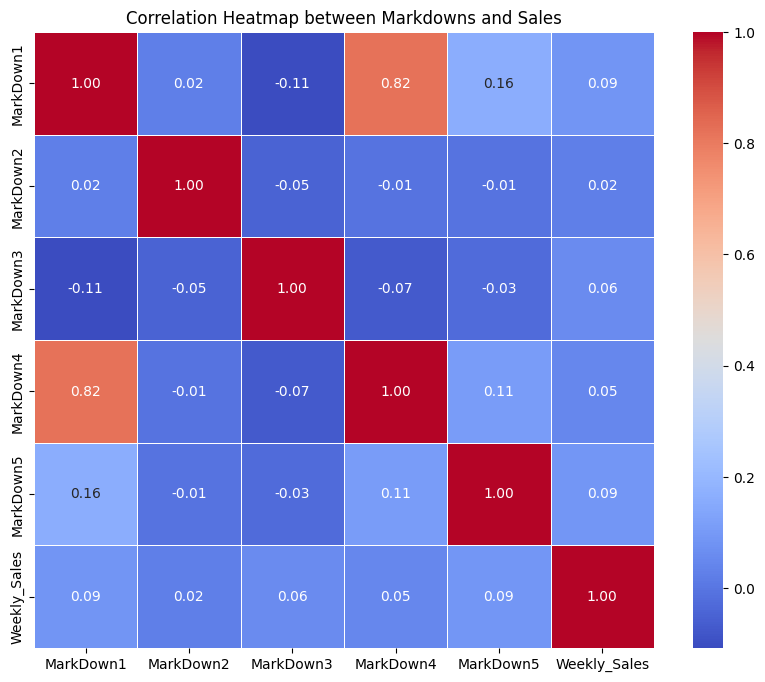

In [20]:
# Calculate correlations between markdown columns and sales
correlation_matrix = combined_df[['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'Weekly_Sales']].corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Plot the heatmap with annotations
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Set the title of the plot
plt.title('Correlation Heatmap between Markdowns and Sales')

# Display the plot
plt.show()

The heatmap depicts a strong positive correlation between MarkDown1 and MarkDown4, while all markdowns show only a weak correlation with Weekly_Sales. This indicates that markdowns have little impact on sales

In [21]:
# # Calculate correlations between markdown columns and sales
# correlation_matrix = combined_df[['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'Weekly_Sales']].corr()

# # Set up the matplotlib figure
# plt.figure(figsize=(10, 8))

# # Plot the heatmap with annotations
# sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# # Set the title of the plot
# plt.title('Correlation Heatmap between Markdowns and Sales')

# Display the plot
# plt.show()

# see relation between holiday markdowns and sales

Lets try to understand the data

The low correlation values indicate that markdowns, as represented by these columns, may not have a strong linear relationship with sales in the dataset. This could suggest several things:

The markdowns may not be the primary driver of sales for the departments/stores we are analyzing.

The markdowns could be applied at different times, which may not align with when demand spikes (e.g., markdowns might not always coincide with holidays or other promotional events).

External factors like holidays, promotions, and other features (e.g., temperature, fuel prices) could be more important drivers of sales.

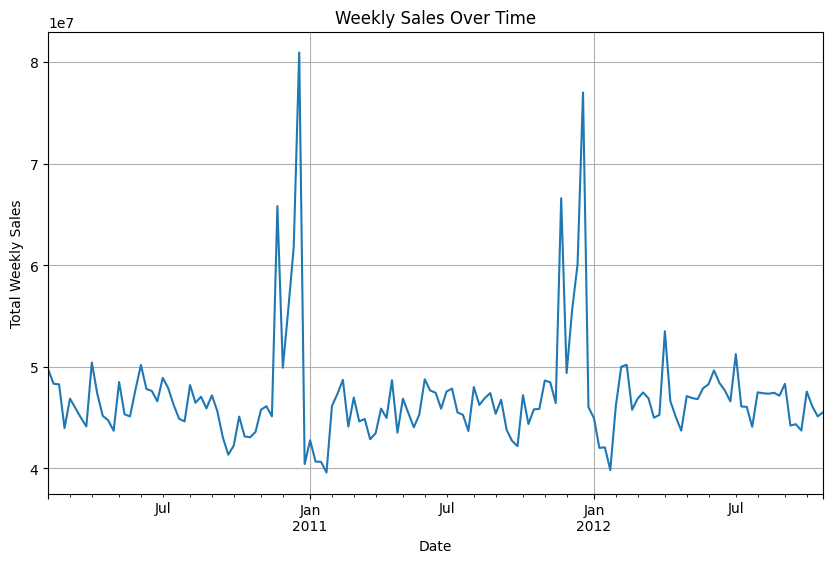

In [22]:
# Sales trends over time
combined_df.groupby('Date')['Weekly_Sales'].sum().plot(figsize=(10, 6))
plt.title('Weekly Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Weekly Sales')
plt.grid()
plt.show()


The line graph shows weekly sales over time, with steady sales between 40 million dollars and 50 million dollars, except for two sharp spikes during the holiday seasons in late 2010 and late 2011.

In [23]:
import plotly.express as px

monthly_sales = combined_df.groupby(pd.Grouper(key = 'Date', freq = 'M'))['Weekly_Sales'].sum().round(2)
monthly_sales = monthly_sales.astype('int64')

# Create the line plot using Plotly Express
fig = px.line(x = list(monthly_sales.index.to_list()),
              y = list(monthly_sales.values),
              title = 'Total Sales by Month')

# Update axis labels
fig.update_xaxes(title_text = 'Date')
fig.update_yaxes(title_text = 'Total Sales in $')

# Update trace settings
fig.update_traces(mode = 'markers+lines')

# Show the plot
fig.show()

<ipython-input-23-a3a08074504f>:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = combined_df.groupby(pd.Grouper(key = 'Date', freq = 'M'))['Weekly_Sales'].sum().round(2)


The graph shows monthly fluctuations in total sales, with sharp peaks around early 2011 and early 2012, while other months have lower and varying sales.

Obvious that sales are high during January, as it is New Year eve

In [24]:
# Group the data by month and calculate the average fuel price per month
monthly_fuel = combined_df.groupby(pd.Grouper(key='Date', freq='M'))['Fuel_Price'].mean().round(2)

# Convert the fuel prices to float for better precision
monthly_fuel = monthly_fuel.astype('float')

# Create the line plot with markers for monthly average fuel price
fig = px.line(x=monthly_fuel.index, y=monthly_fuel.values, title='Average Fuel Price by Month')

# Update axis labels
fig.update_xaxes(title_text='Date')
fig.update_yaxes(title_text='Avg. Fuel Price in $')

# Show markers and lines on the plot
fig.update_traces(mode='markers+lines')

# Display the plot
fig.show()

<ipython-input-24-5ee51603b854>:2: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



The line graph shows the monthly average fuel prices over time. Fuel prices exhibit fluctuations, with noticeable peaks around mid-2011 and mid-2012 and troughs in early 2010 and late 2011.

see fuel to sales visualizations

In [25]:
# Group the data by month and calculate the average temperature per month
monthly_temperature = combined_df.groupby(pd.Grouper(key='Date', freq='M'))['Temperature'].mean().round(2)

# Convert the temperature values to float for precision
monthly_temperature = monthly_temperature.astype('float')

# Create a line plot for monthly average temperature
fig = px.line(x=monthly_temperature.index, y=monthly_temperature.values, title='Average Monthly Temperature')

# Update axis labels
fig.update_xaxes(title_text='Date')
fig.update_yaxes(title_text='Avg. Temperature in °F or °C')  # Adjust based on your temperature units

# Show markers and lines on the plot
fig.update_traces(mode='markers+lines')

# Display the plot
fig.show()

<ipython-input-25-a736a6d97e90>:2: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



The graph shows average monthly temperatures over three years, showing a clear seasonal pattern with higher temperatures in summer and lower temperatures in winter.

see temperature to sales

Mean Weekly Sales during Holidays: 17035.823187350394
Mean Weekly Sales during Non-Holidays: 15901.445069008367


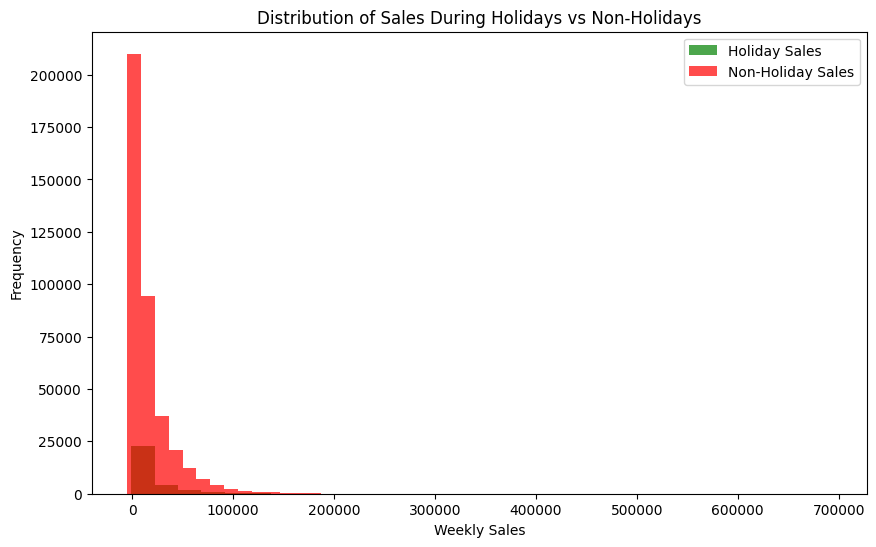

In [26]:
# Separate the data into holiday and non-holiday weeks based on the 'IsHoliday_x' column
holiday_sales = combined_df[combined_df['IsHoliday_x'] == True]['Weekly_Sales']
non_holiday_sales = combined_df[combined_df['IsHoliday_x'] == False]['Weekly_Sales']

# Calculate the mean sales during holiday and non-holiday weeks
mean_holiday_sales = holiday_sales.mean()
mean_non_holiday_sales = non_holiday_sales.mean()

# Print the results
print(f'Mean Weekly Sales during Holidays: {mean_holiday_sales}')
print(f'Mean Weekly Sales during Non-Holidays: {mean_non_holiday_sales}')

# Plot the distribution of sales during holidays vs non-holidays
plt.figure(figsize=(10, 6))
plt.hist(holiday_sales, bins=30, alpha=0.7, label='Holiday Sales', color='green')
plt.hist(non_holiday_sales, bins=30, alpha=0.7, label='Non-Holiday Sales', color='red')
plt.legend()
plt.title('Distribution of Sales During Holidays vs Non-Holidays')
plt.xlabel('Weekly Sales')
plt.ylabel('Frequency')
plt.show()


The graph compares weekly sales during holidays and non-holidays, showing that non-holiday sales occur more frequently but are generally lower, while higher sales are less common but more likely during holidays.


make holiday and non holiday sales seperate

IsHoliday_x
False    15901.445069
True     17035.823187
Name: Weekly_Sales, dtype: float64


<ipython-input-27-614fcbe58fbc>:12: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




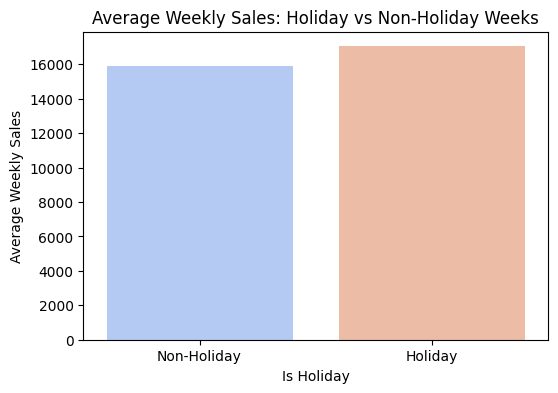

In [27]:
# Check the effect of holidays (IsHoliday_x) on weekly sales
holiday_sales = combined_df.groupby('IsHoliday_x')['Weekly_Sales'].mean()

# Print the average sales for holiday and non-holiday weeks
print(holiday_sales)

# Plot the results
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 4))
sns.barplot(x=holiday_sales.index, y=holiday_sales.values, palette='coolwarm')
plt.title('Average Weekly Sales: Holiday vs Non-Holiday Weeks')
plt.xlabel('Is Holiday')
plt.ylabel('Average Weekly Sales')
plt.xticks([0, 1], ['Non-Holiday', 'Holiday'], rotation=0)
plt.show()


The graph shows that average weekly sales during holidays are slightly higher than those during non-holidays, indicating a small increase in sales during holiday weeks.

Lets augment moving averages and lags and see the sale trends

In [28]:
# Convert 'Date' to datetime format (handling day-first format)
combined_df['Date'] = pd.to_datetime(combined_df['Date'], dayfirst=True)

# Calculate the lag_1 (previous week's sales or previous quarter's sales)
combined_df['lag_1'] = combined_df.groupby(['Store', 'Dept'])['Weekly_Sales'].shift(1)

# Calculate the moving average (3-period moving average for Weekly_Sales)
combined_df['ma_3'] = combined_df.groupby(['Store', 'Dept'])['Weekly_Sales'].transform(lambda x: x.rolling(window=3).mean())

# Extract the quarter and year from the Date column
combined_df['Year_Quarter'] = combined_df['Date'].dt.to_period('Q')

# Aggregate the data by Store, Dept, and Year_Quarter
quarterly_data = combined_df.groupby(['Store', 'Dept', 'Year_Quarter']).agg({
    'Weekly_Sales': 'sum',     # Sum of weekly sales for the quarter
    'lag_1': 'mean',           # Mean of lag_1 for the quarter
    'ma_3': 'mean'             # Mean of ma_3 for the quarter
}).reset_index()


<ipython-input-29-f65265e750a9>:43: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



<ipython-input-29-f65265e750a9>:44: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or d

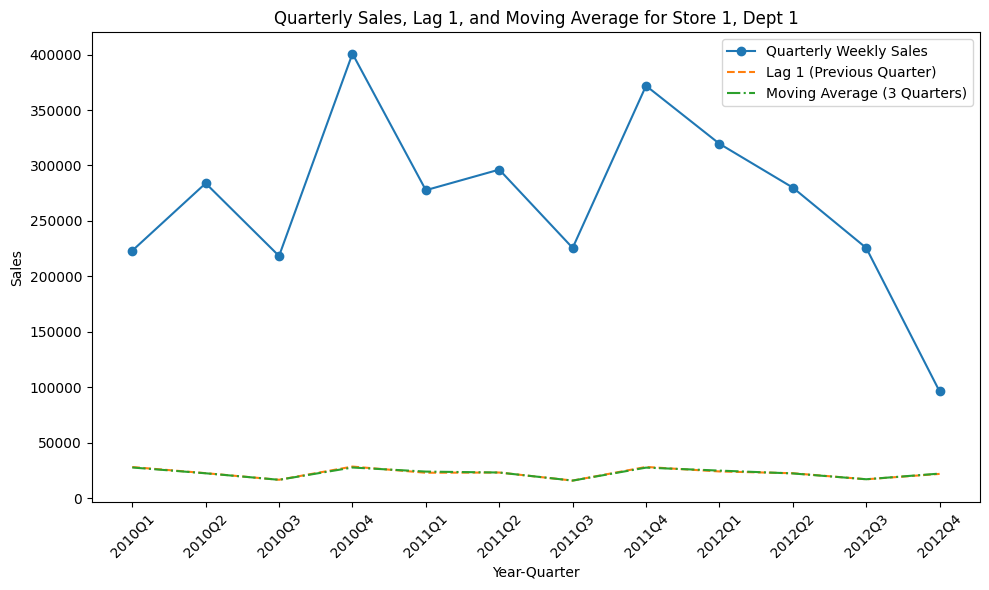

In [29]:

# Select a specific store and department for visualization
store_id = 1
dept_id = 1

store_dept_quarterly_data = quarterly_data[
    (quarterly_data['Store'] == store_id) & (quarterly_data['Dept'] == dept_id)
]

# Plot the aggregated data by quarter
plt.figure(figsize=(10, 6))

# Plot Quarterly Weekly Sales
plt.plot(
    store_dept_quarterly_data['Year_Quarter'].astype(str),
    store_dept_quarterly_data['Weekly_Sales'],
    label='Quarterly Weekly Sales',
    marker='o'
)

# Plot Lag 1 (Previous Quarter)
plt.plot(
    store_dept_quarterly_data['Year_Quarter'].astype(str),
    store_dept_quarterly_data['lag_1'],
    label='Lag 1 (Previous Quarter)',
    linestyle='--'
)

# Plot Moving Average (3 Quarters)
plt.plot(
    store_dept_quarterly_data['Year_Quarter'].astype(str),
    store_dept_quarterly_data['ma_3'],
    label='Moving Average (3 Quarters)',
    linestyle='-.'
)

# Add labels and title
plt.title(f'Quarterly Sales, Lag 1, and Moving Average for Store {store_id}, Dept {dept_id}')
plt.xlabel('Year-Quarter')
plt.ylabel('Sales')
plt.legend()

# Fill missing values (if any) for lag_1 and ma_3
combined_df['lag_1'].fillna(0, inplace=True)  # Fill with 0 or use other strategies
combined_df['ma_3'].fillna(0, inplace=True)   # Fill with 0 or use other strategies

# Format x-axis for better readability
plt.xticks(rotation=45)

# Ensure layout fits well
plt.tight_layout()

# Show the plot
plt.show()

window size shuld be on weekly sales not on quarters

Investigate any outliers or extreme values in the dataset (especially in Sales, Fuel Price, or Temperature). Sometimes outliers can distort correlation values and hinder effective modeling. Also, missing values to be treated for markdown columns. It is better to fill null values with zero, rather than dropping the columns or replacing it with some value. Because the markdown is started from 2011 itself and anything before that would be zero, and if frop any null value rows after 2011, the sales data would also be dropped but we cannot afford to lose sales data as that is our target variable.

In [30]:
combined_df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y,Type,Size,lag_1,ma_3,Year_Quarter
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315,0.00,0.000000,2010Q1
1,1,1,2010-02-12,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True,A,151315,24924.50,0.000000,2010Q1
2,1,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False,A,151315,46039.49,37519.846667,2010Q1
3,1,1,2010-02-26,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False,A,151315,41595.55,35679.526667,2010Q1
4,1,1,2010-03-05,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False,A,151315,19403.54,27608.996667,2010Q1


do seasonal decomposition on weekly sales

In [33]:

# Parse date column in sales data with the correct format
sales['Date'] = pd.to_datetime(sales['Date'], dayfirst=True)

# Aggregate weekly sales by date
weekly_sales = sales.groupby('Date')['Weekly_Sales'].sum()

# Perform seasonal decomposition
result = seasonal_decompose(weekly_sales, model='additive', period=52)  # Assuming weekly data with annual seasonality

# Plot decomposition
result.plot()
plt.show()


NameError: name 'sales' is not defined

The graph shows weekly sales with a general upward trend over time. There are noticeable seasonal peaks and some random fluctuations (residuals) around the trend.